# Kankamon Thaweephol   (ID.60199130056)

## Final Project - Identifying Fraud From Enron Data

### About Enron

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives.

### Import library

In [87]:
import pandas as pd
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

# import files from specific folder
# from tester import two functions will save time creat some function for validation and algorithm
import sys
sys.path.append("script/")

from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data

# load for algorithm
import sklearn
import numpy as np
import pickle
from time import time
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from ggplot import *
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import warnings
warnings.filterwarnings('ignore')

In [88]:
# same way with other data.type, pd.read_type() and df.to_type()
data_dict = pd.read_pickle('final_project_dataset.pkl')

In [89]:
# change it to dataframe from dict
data_df = pd.DataFrame(data_dict)

In [90]:
# run df.head() to check table and then transpose it
data_df = pd.DataFrame.transpose(data_df)

### The Enron Data

In [91]:
# df.shape() check row and col
print 'The number of row and column in this dataset: ' + str(data_df.shape)

The number of row and column in this dataset: (146, 21)


In [92]:
# run again to confirm if data transposed to correct shape
data_df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


### Feature Selection

All available features fall into **3 major** types of features, **namely financial features**, **email features** and **POI labels**.

- financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

- email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

- POI label: [‘poi’] (boolean, represented as integer)

In [93]:
## Create features list
features_list = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'bonus', 'restricted_stock_deferred', 
                 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 
                 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees'] 

### Load the dictionary containing the dataset
enron_data = pickle.load(open("final_project_dataset.pkl", "r") )

## Load POI names file
f = open("poi_names.txt", "r")

In [94]:
# dict to dataframe
df = pd.DataFrame.from_dict(data_dict, orient='index')

# Convert to np nan
df.replace('NaN', np.nan, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income              49 non-null float

In [95]:
print data_dict.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

### Data Exploration
- **The number of POI (persons of interest) and non-POI**

In [96]:
# sum(data['variable']) need variable as condition
# len(data) not need condition
is_poi = data_df[data_df['poi']==True]
non_poi = data_df[data_df['poi']==False]
print 'The number of POI is : ' + str(sum(is_poi['poi']))
print 'The number of non-POI is : ' + str(len(non_poi))

The number of POI is : 18
The number of non-POI is : 128


- **The number of POLs in our POI list**

In [97]:
# How many POIs in our POI list:
with open("poi_names.txt") as f:
    pois_total = len(f.readlines()[2:])
print (pois_total)

35


- **Top 5 of missing values in each column**

In [98]:
data_df[data_df=='NaN']=None
data_df.isnull().sum().sort_values(ascending=False)[:5]

loan_advances                142
director_fees                129
restricted_stock_deferred    128
deferral_payments            107
deferred_income               97
dtype: int64

- **Top 5 of missing values in each row**

In [99]:
# df.isnull().sum(axis=1) count missing value in row
# df.isnull().sum(axis=1)[:5] show 5th row of count missing value
data_df.isnull().sum(axis=1).sort_values(ascending=False)[:5]

LOCKHART EUGENE E                20
GRAMM WENDY L                    18
WROBEL BRUCE                     18
WHALEY DAVID A                   18
THE TRAVEL AGENCY IN THE PARK    18
dtype: int64

- **Detail of 'LOCKHART EUGENE E' who missing 20 values**

In [100]:
# df.loc['variable', :] chek details with specific location
data_df.loc['LOCKHART EUGENE E']

bonus                         None
deferral_payments             None
deferred_income               None
director_fees                 None
email_address                 None
exercised_stock_options       None
expenses                      None
from_messages                 None
from_poi_to_this_person       None
from_this_person_to_poi       None
loan_advances                 None
long_term_incentive           None
other                         None
poi                          False
restricted_stock              None
restricted_stock_deferred     None
salary                        None
shared_receipt_with_poi       None
to_messages                   None
total_payments                None
total_stock_value             None
Name: LOCKHART EUGENE E, dtype: object

"LOCKHART EUGENE E" seems to not add any information, (all value are missing except the poi column)

- **Find outlier for specific variable**

In [101]:
data_df.loc[:,'bonus'].sort_values(ascending=False)[:5]

TOTAL                 97343619
LAVORATO JOHN J        8000000
LAY KENNETH L          7000000
SKILLING JEFFREY K     5600000
BELDEN TIMOTHY N       5249999
Name: bonus, dtype: object

"TOTAL" also not an individual.

The dataset contains information of 21 features from 146 employees.  
**"NaN"s** are actually strings so I will replace them with Numpy's "NaN"s so I can count the information I have across the variables.

### Count number of NaN's for columns

In [102]:
# Count number of NaN's for columns
print df.isnull().sum()

# DataFrame dimeansion
print df.shape

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       60
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                 35
from_poi_to_this_person       60
dtype: int64
(146, 21)


### Removing Outliers and Handling 'NaN' values

In [103]:
# Removing column from database if counter > 65

for column, series in df.iteritems():
    if series.isnull().sum() > 65:
        df.drop(column, axis=1, inplace=True)
       
# Drop email address column
if 'email_address' in list(df.columns.values):
    df.drop('email_address', axis=1, inplace=True)

        
df_imp = df.replace(to_replace=np.nan, value=0)
df_imp = df.fillna(0).copy(deep=True)
df_imp.columns = list(df.columns.values)
print df_imp.isnull().sum()
print df_imp.head()

df_imp.describe()

salary                     0
to_messages                0
total_payments             0
exercised_stock_options    0
bonus                      0
restricted_stock           0
shared_receipt_with_poi    0
total_stock_value          0
expenses                   0
from_messages              0
other                      0
from_this_person_to_poi    0
poi                        0
from_poi_to_this_person    0
dtype: int64
                      salary  to_messages  total_payments  \
ALLEN PHILLIP K     201955.0       2902.0       4484442.0   
BADUM JAMES P            0.0          0.0        182466.0   
BANNANTINE JAMES M     477.0        566.0        916197.0   
BAXTER JOHN C       267102.0          0.0       5634343.0   
BAY FRANKLIN R      239671.0          0.0        827696.0   

                    exercised_stock_options      bonus  restricted_stock  \
ALLEN PHILLIP K                   1729541.0  4175000.0          126027.0   
BADUM JAMES P                      257817.0        0.0        

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,from_poi_to_this_person
count,1.460000e+02,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,1.460000e+02,1.460000e+02,146.000000,1.460000e+02,146.000000,146.000000
mean,3.658114e+05,1221.589041,4.350622e+06,4.182736e+06,1.333474e+06,1.749257e+06,692.986301,5.846018e+06,7.074827e+04,358.602740,5.854318e+05,24.287671,38.226027
std,2.203575e+06,2226.770637,2.693448e+07,2.607040e+07,8.094029e+06,1.089995e+07,1072.969492,3.624681e+07,4.327163e+05,1441.259868,3.682345e+06,79.278206,73.901124
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,0.000000,-4.409300e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,9.394475e+04,0.000000e+00,0.000000e+00,8.115000e+03,0.000000,2.288695e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
50%,2.105960e+05,289.000000,9.413595e+05,6.082935e+05,3.000000e+05,3.605280e+05,102.500000,9.659550e+05,2.018200e+04,16.500000,9.595000e+02,0.000000,2.500000
75%,2.708505e+05,1585.750000,1.968287e+06,1.714221e+06,8.000000e+05,8.145280e+05,893.500000,2.319991e+06,5.374075e+04,51.250000,1.506065e+05,13.750000,40.750000
max,2.670423e+07,15149.000000,3.098866e+08,3.117640e+08,9.734362e+07,1.303223e+08,5521.000000,4.345095e+08,5.235198e+06,14368.000000,4.266759e+07,609.000000,528.000000


### Data Wrangling (Data cleansing)
We have to delete these data because:  
- **'TOTAL'** is outlier also is not an individual  
- **'THE TRAVEL AGENCY IN THE PARK'** is not a individual  
- **'LOCKHART EUGENE E'** no any information

In [104]:
data_df.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E'], inplace=True)

### Data Plotting

In [105]:
# Plotting Data
# for i, _ in enumerate(dataset), need _ because enumerate will return index and value
# plt.subplot() includes the numbers of row, column, index
# plt.subplots_adjust(hspace=0.5) is distance between each row
def plot_univariate(dataset):
    fig = plt.figure(figsize=(20, 40))
    for i, _ in enumerate(dataset):
        try:
            sub = plt.subplot(7,3, i+1)
            plt.xticks(rotation='vertical')
            plt.subplots_adjust(hspace=0.5) 
            sub.hist(dataset.iloc[:,i].dropna())
            sub.set_xlabel(dataset.columns[i])
        except:
            continue

### Plotting data without outliers

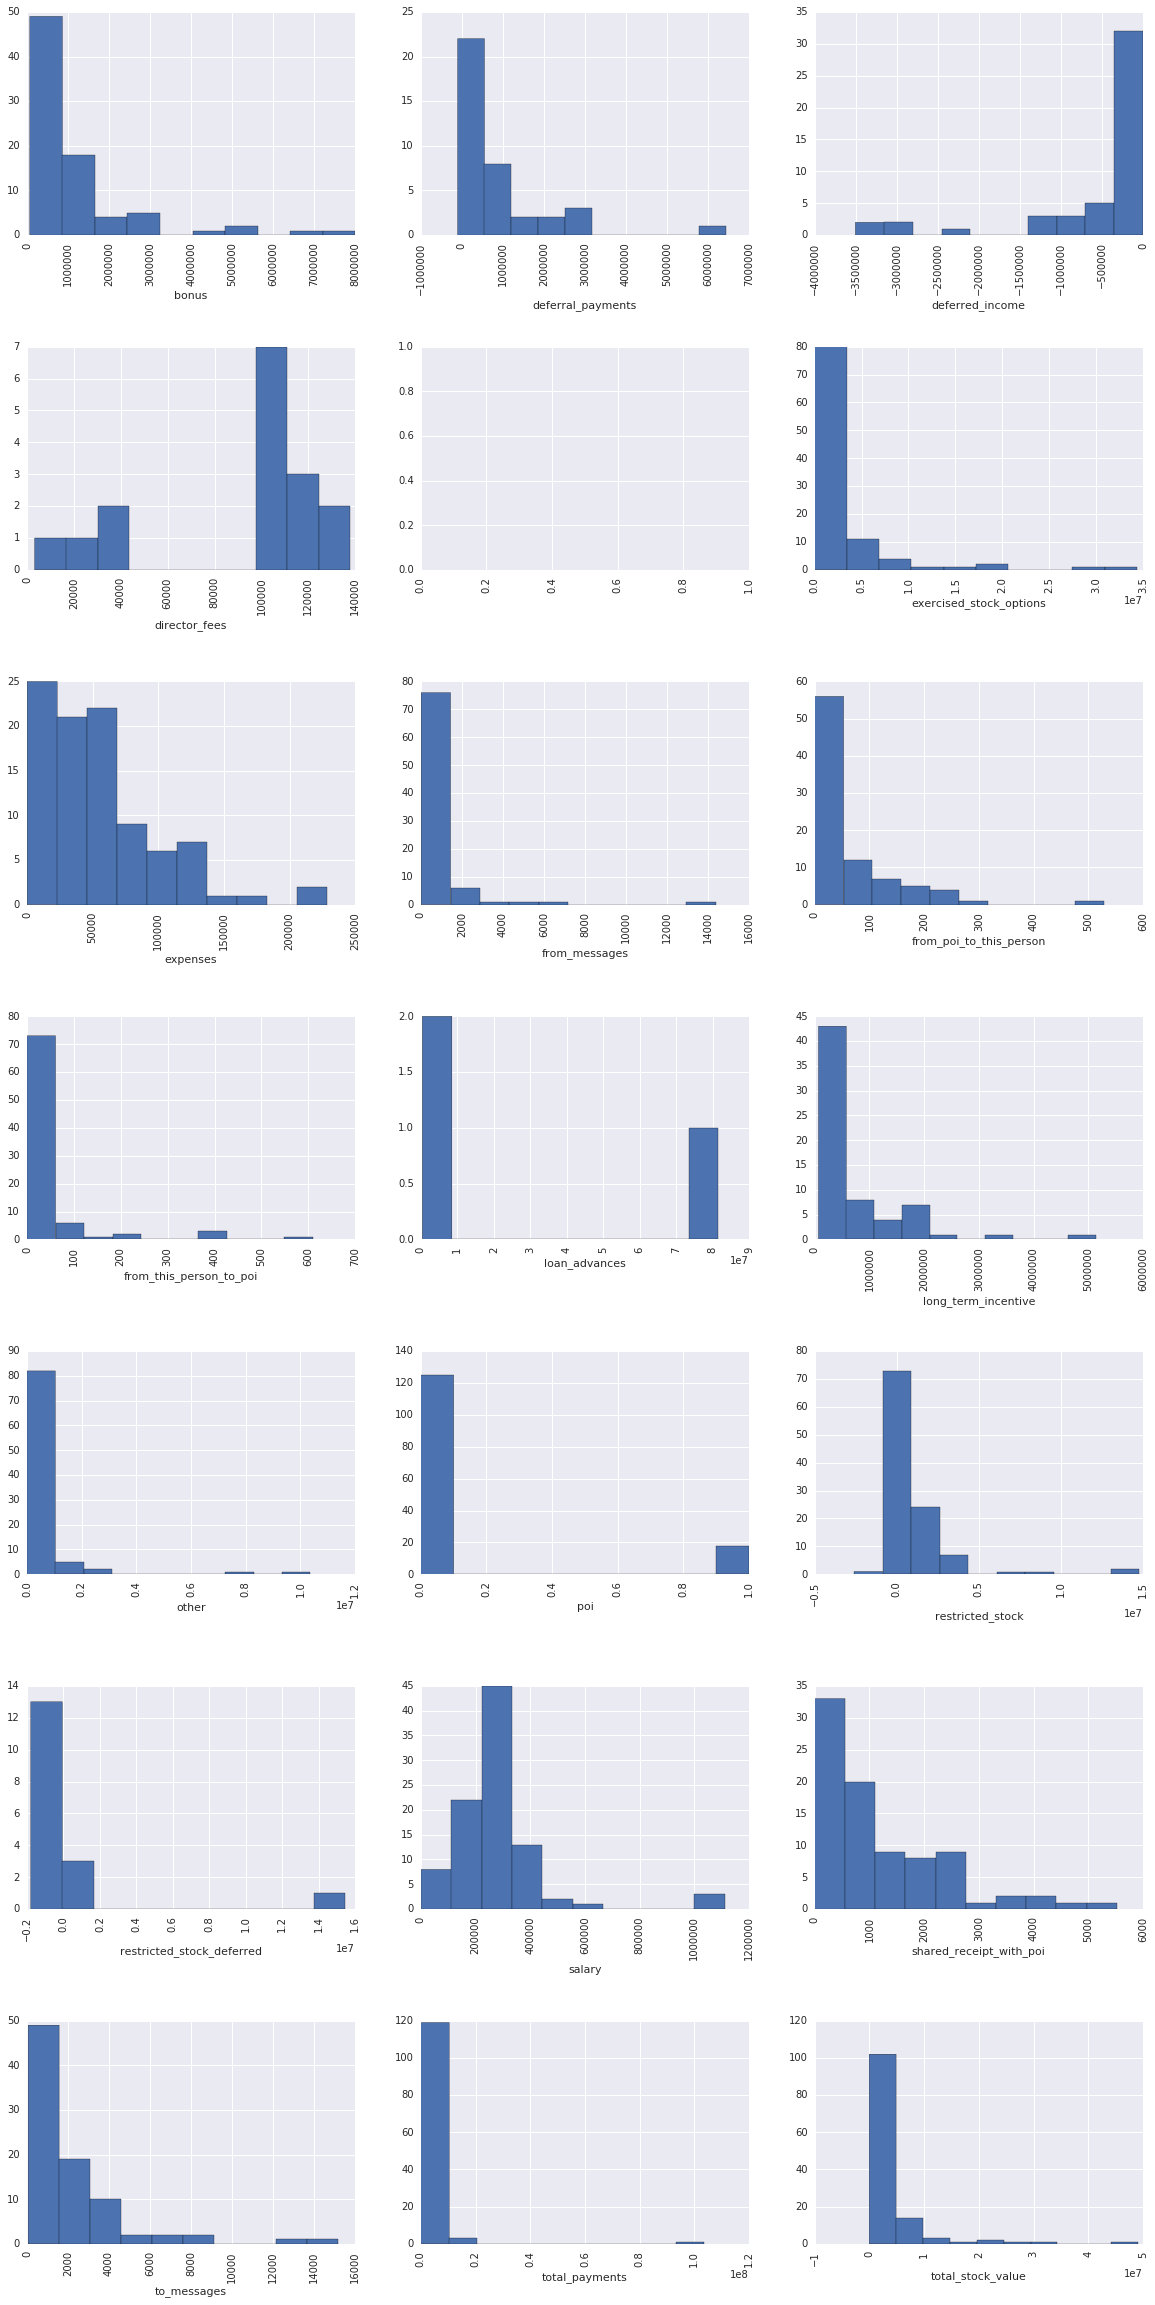

In [106]:
plot_univariate(data_df)

In [107]:
total_index = enron_data.keys().index("TOTAL")
print(total_index)
travel_index = enron_data.keys().index("THE TRAVEL AGENCY IN THE PARK")
print(travel_index)
lock_index = enron_data.keys().index("LOCKHART EUGENE E")
print(lock_index)
df_subset = df_imp.drop(df_imp.index[[total_index,travel_index,lock_index]])
df_subset.describe()

104
101
90


,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,from_poi_to_this_person
count,1.430000e+02,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,1.430000e+02,1.430000e+02,143.000000,1.430000e+02,143.000000,143.000000
mean,3.711845e+05,1232.685315,4.432457e+06,4.253742e+06,1.356204e+06,1.772641e+06,696.503497,5.938605e+06,7.159101e+04,365.671329,5.977068e+05,24.685315,38.510490
std,2.226299e+06,2247.635642,2.721133e+07,2.633948e+07,8.177373e+06,1.101308e+07,1082.589195,3.662162e+07,4.372071e+05,1455.560401,3.720047e+06,80.056707,74.580788
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,0.000000,-4.409300e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,1.070145e+05,0.000000e+00,0.000000e+00,1.623000e+04,0.000000,2.365980e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
50%,2.106920e+05,266.000000,9.665220e+05,6.078370e+05,3.000000e+05,3.605280e+05,91.000000,9.558730e+05,1.883400e+04,17.000000,1.105000e+03,0.000000,1.000000
75%,2.702590e+05,1639.000000,1.991740e+06,1.741654e+06,8.250000e+05,6.985810e+05,967.500000,2.307584e+06,5.353450e+04,52.500000,1.513555e+05,13.500000,40.500000
max,2.670423e+07,15149.000000,3.098866e+08,3.117640e+08,9.734362e+07,1.303223e+08,5521.000000,4.345095e+08,5.235198e+06,14368.000000,4.266759e+07,609.000000,528.000000


หลังจากที่ทำการ Drop ข้อมูลไปแล้ว ก็มาทำการเช็คข้อมูลอีกรอบ

**ข้อมูลก่อน Drop:**
- The number of POI is : 18
- The number of non-POI is : 128

In [108]:
print "Values:", list(df_subset.columns.values)

print "Shape: ", df_subset.shape

print "The number of POI in DataSet: ", (df_subset['poi'] == 1).sum()
print "The number of non-POI in Dataset: ", (df_subset['poi'] == 0).sum()

Values: ['salary', 'to_messages', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'total_stock_value', 'expenses', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'from_poi_to_this_person']
Shape:  (143, 14)
The number of POI in DataSet:  18
The number of non-POI in Dataset:  125


# Algorithm and Validation

### Create new features

The following new features will be created:
- poi_ratio = from_poi_to_this_person + from_this_person_to_poi / from_messages + to_messages
- fraction_to_poi = from_this_person_to_poi / from_messages
- fraction_from_poi = from_poi_to_this_person / to_messages

In [109]:
poi_ratio = (df_subset['from_poi_to_this_person'] + df_subset['from_this_person_to_poi']) / (df_subset['from_messages'] + df_subset['to_messages'])
fraction_to_poi = (df_subset['from_this_person_to_poi']) / (df_subset['from_messages'])
fraction_from_poi = (df_subset['from_poi_to_this_person']) / (df_subset['to_messages'])
scale = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 100), copy=True)

df_subset['poi_ratio'] = pandas.Series(poi_ratio) * 100
df_subset['fraction_to_poi'] = pandas.Series(fraction_to_poi) * 100
df_subset['fraction_from_poi'] = pandas.Series(fraction_from_poi) * 100
salary_scaled = scale.fit_transform(df_subset['salary'])
df_subset.describe()

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,from_poi_to_this_person,poi_ratio,fraction_to_poi,fraction_from_poi
count,1.430000e+02,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,1.430000e+02,1.430000e+02,143.000000,1.430000e+02,143.000000,143.000000,84.000000,84.000000,84.000000
mean,3.711845e+05,1232.685315,4.432457e+06,4.253742e+06,1.356204e+06,1.772641e+06,696.503497,5.938605e+06,7.159101e+04,365.671329,5.977068e+05,24.685315,38.510490,4.778584,18.408794,3.794669
std,2.226299e+06,2247.635642,2.721133e+07,2.633948e+07,8.177373e+06,1.101308e+07,1082.589195,3.662162e+07,4.372071e+05,1455.560401,3.720047e+06,80.056707,74.580788,4.694177,21.249927,4.089061
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,0.000000,-4.409300e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,1.070145e+05,0.000000e+00,0.000000e+00,1.623000e+04,0.000000,2.365980e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.245810,1.125167,0.887105
50%,2.106920e+05,266.000000,9.665220e+05,6.078370e+05,3.000000e+05,3.605280e+05,91.000000,9.558730e+05,1.883400e+04,17.000000,1.105000e+03,0.000000,1.000000,3.176610,10.057359,2.584537
75%,2.702590e+05,1639.000000,1.991740e+06,1.741654e+06,8.250000e+05,6.985810e+05,967.500000,2.307584e+06,5.353450e+04,52.500000,1.513555e+05,13.500000,40.500000,6.768666,26.611842,5.536290
max,2.670423e+07,15149.000000,3.098866e+08,3.117640e+08,9.734362e+07,1.303223e+08,5521.000000,4.345095e+08,5.235198e+06,14368.000000,4.266759e+07,609.000000,528.000000,22.435175,100.000000,21.734104


### Training Classifier

Split the data at first on training and test data. We will use Stratified Shuffle Split due to small dataset

In [110]:
labels = df_subset['poi'].copy(deep=True).astype(int).as_matrix()
features = (df_subset.drop('poi', axis=1)).fillna(0).copy(deep=True).as_matrix()
shuffle = sklearn.cross_validation.StratifiedShuffleSplit(labels, 4, test_size=0.3, random_state=0)

Let's try four different initial models, and then start tune parameters of few models.

#### 1) Gaussian Naive Bayes Classifier

In [111]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
scores = sklearn.cross_validation.cross_val_score(gnb_clf, features, labels)
print scores

[ 0.125       0.14583333  0.82978723]


#### 2) Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10)
scores = sklearn.cross_validation.cross_val_score(rf_clf, features, labels)
print scores

[ 0.85416667  0.875       0.91489362]


#### 3) Decision Tree Classifier

In [113]:
from sklearn.tree import DecisionTreeClassifier

dtc_clf = RandomForestClassifier(n_estimators=10)
scores = sklearn.cross_validation.cross_val_score(rf_clf, features, labels)
print scores

[ 0.83333333  0.875       0.85106383]


#### 4) AdaBoost Classifier

In [114]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier(n_estimators=100)
scores = sklearn.cross_validation.cross_val_score(ab_clf, features, labels)
print scores 

[ 0.83333333  0.83333333  0.87234043]


### Tunning Choosen Classifiers by using grid_search.GridSearchCV

#### Random Forest

Let's investigate main parameters of random forest:

- min_samples_split
- n_estimators
- min_samples_leaf
- criterion

In [115]:
from sklearn import grid_search
from sklearn.tree import DecisionTreeClassifier

cv = sklearn.cross_validation.StratifiedShuffleSplit(labels, n_iter=10)
def scoring(estimator, features_test, labels_test):
  labels_pred = estimator.predict(features_test)
  p = sklearn.metrics.precision_score(labels_test, labels_pred, average='micro')
  r = sklearn.metrics.recall_score(labels_test, labels_pred, average='micro')
  if p > 0.3 and r > 0.3:
    return sklearn.metrics.f1_score(labels_test, labels_pred, average='macro')
  return 0

In [116]:
parameters = {'max_depth': [2,3,4,5,6],'min_samples_split':[2,3,4,5], 'n_estimators':[10,20,50], 'min_samples_leaf':[1,2,3,4], 'criterion':('gini', 'entropy')}

rf_clf = RandomForestClassifier()
rfclf = grid_search.GridSearchCV(rf_clf, parameters, scoring = scoring, cv = cv)
rfclf.fit(features, labels)

print rfclf.best_estimator_
print rfclf.best_score_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
0.664377289377


#### Decision Tree

In [117]:
parameters = {'max_depth': [1,2,3,4,5,6,8,9,10],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,4,5,6,7,8], 'criterion':('gini', 'entropy')}

dtc_clf = sklearn.tree.DecisionTreeClassifier() 
dtcclf = grid_search.GridSearchCV(dtc_clf, parameters, scoring = scoring, cv = cv)
dtcclf.fit(features, labels)

print dtcclf.best_estimator_
print dtcclf.best_score_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.893270655271


#### AdaBoost

In [118]:
from sklearn import grid_search
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
parameters = {'n_estimators' : [5, 10, 30, 40, 50, 100,150], 'learning_rate' : [0.1, 0.5, 1, 1.5, 2, 2.5], 'algorithm' : ('SAMME', 'SAMME.R')}
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8))
adaclf = grid_search.GridSearchCV(ada_clf, parameters, scoring = scoring, cv = cv)
adaclf.fit(features, labels)

print adaclf.best_estimator_
print adaclf.best_score_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.1, n_estimators=40, random_state=None)
0.732905982906


### Testing Classifier

#### Random Forest Best Estimator

In [119]:
rf_best_clf = rfclf.best_estimator_
list_cols = list(df_subset.columns.values)
list_cols.remove('poi')
list_cols.insert(0, 'poi')
data = df_subset[list_cols].fillna(0).to_dict(orient='records')
enron_data_sub = {}
counter = 0
for item in data:
    enron_data_sub[counter] = item
    counter += 1
    
test_classifier(rf_best_clf, enron_data_sub, list_cols)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.85500	Precision: 0.33522	Recall: 0.08900	F1: 0.14066	F2: 0.10433
	Total predictions: 15000	True positives:  178	False positives:  353	False negatives: 1822	True negatives: 12647



#### Decision Tree Best Estimator

In [120]:
dtc_best_clf = dtcclf.best_estimator_
test_classifier(dtc_best_clf, enron_data_sub, list_cols)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.88100	Precision: 0.55943	Recall: 0.50600	F1: 0.53137	F2: 0.51585
	Total predictions: 15000	True positives: 1012	False positives:  797	False negatives:  988	True negatives: 12203



#### AdaBoost Best Estimator

In [121]:
ada_best_clf = adaclf.best_estimator_
test_classifier(ada_best_clf, enron_data_sub, list_cols)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.1, n_estimators=40, random_state=None)
	Accuracy: 0.82660	Precision: 0.35406	Recall: 0.36450	F1: 0.35920	F2: 0.36236
	Total predictions: 15000	True positives:  729	False positives: 1330	False negatives: 1271	True negatives: 11670



### Summary Best Estimator
| Algorithm | Accuracy | Precision | Recall | F1 | F2 | 
|---|---|---|---|---|  
| Random Forest Classifier() | 0.85 | 0.33 | 0.08 | 0.14 | 0.10 |
| Decision Tree Classifier() | 0.88 | 0.55 | 0.50 | 0.53 | 0.51 |
| AdaBoost Classifier() | 0.82 | 0.35 | 0.36 | 0.35 | 0.36 |

### Validation and Evaluation

##### Validation

- The validation is a process of model performance evaluation. 
- Classic mistake is to use small data set for the model training or validate model on the same data set as train it.
- There are a number of strategies to validate the model. One of them is to split the available data into train and test data another one is to perform a cross validation: process of splitting the data on k beans equal size; run learning experiments; repeat this operation number of times and take the average test result.

##### Evaluation (Decision Tree Classifier)
**1) Avg. Precision: 0.55**  
Precision is also referred to as positive predictive value. It's calculated as True Positive/(True Positive + False Positive). In here it means the proportion of the correct prediction of all the people who are predicted to be poi.  
**2) Avg. Recall: 0.50**  
Recall is also referred to as the true positive rate or sensitivity. It's calculated as True Positive/(True Positive + False Negative). In here it means the proportion of the poi the model can detect of all the poi. For fraud prediction models, higher recall is generally preferred even if some precision is sacrificed.  

## References 

- Introduction to Machine Learning (Udacity)
- scikit-learn Documentation
- RandomForest Wordpress
- gadatascience
- sklearn documentation: http://scikit-learn.org/stable/index.html
- pandas documentation: http://pandas.pydata.org